D:\Anaconda\envs\dart\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


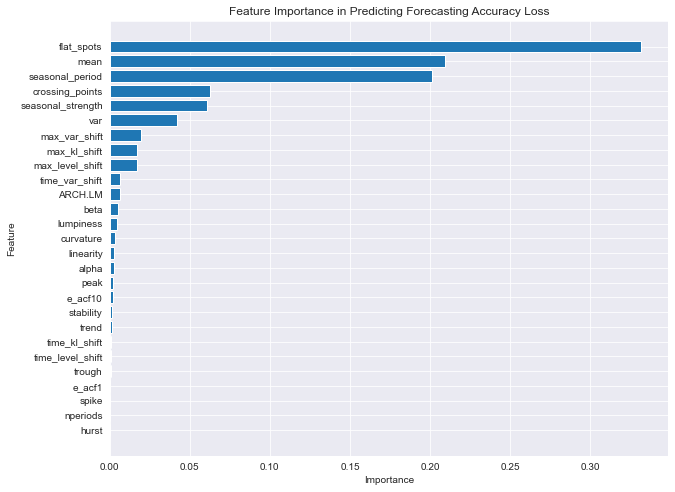

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tabulate import tabulate

features = pd.read_csv('../results/features/all_datasets_features.csv')
features = features.dropna(axis=1)
feature_columns = features.columns[2:-2]
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

feature_importance = gbm.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Forecasting Accuracy Loss')
plt.gca().invert_yaxis()
plt.show()

(822, 27)

D:\Anaconda\envs\dart\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


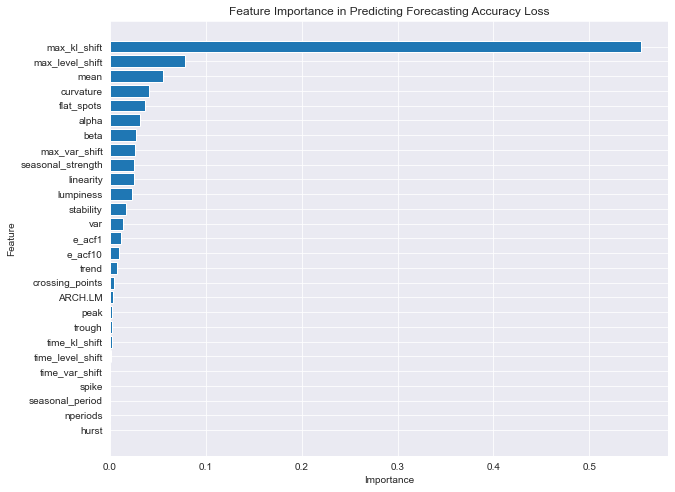

(206, 27)
RMSE 1.2900830259221143
R2 -0.17650046748363302


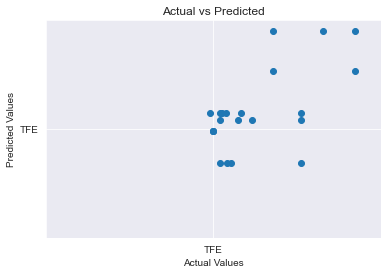

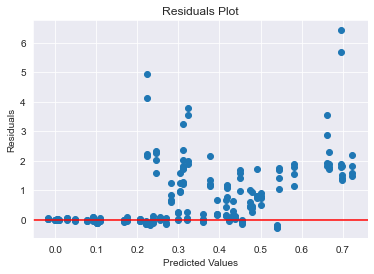

Training MSE: 0.05051208701271675
Training R^2: 0.9509032780473324


In [29]:
features = pd.read_csv('../results/features/all_datasets_features_diff.csv')
features = features.dropna(axis=1)
feature_columns = features.columns[2:-2]
N = features.shape[0]
X_train = features[feature_columns][:int(N*0.8)]
y_train = features[['TFE']][:int(N*0.8)]
display(X_train.shape)
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

feature_importance = gbm.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Forecasting Accuracy Loss')
plt.gca().invert_yaxis()
plt.show()

X_test = features[feature_columns][int(N*0.8):]
y_test = features[['TFE']][int(N*0.8):]
print(X_test.shape)
y_pred = gbm.predict(X_test)

mse = mean_squared_error(y_test.values.squeeze(), y_pred)
rmse = np.sqrt(mse)
print('RMSE', rmse)
r2 = r2_score(y_test.values.squeeze(), y_pred)
print('R2', r2)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()
residuals = y_test.values.squeeze() - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

train_predictions = gbm.predict(X_train)

# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, train_predictions)

print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

(1028, 27)

D:\Anaconda\envs\dart\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


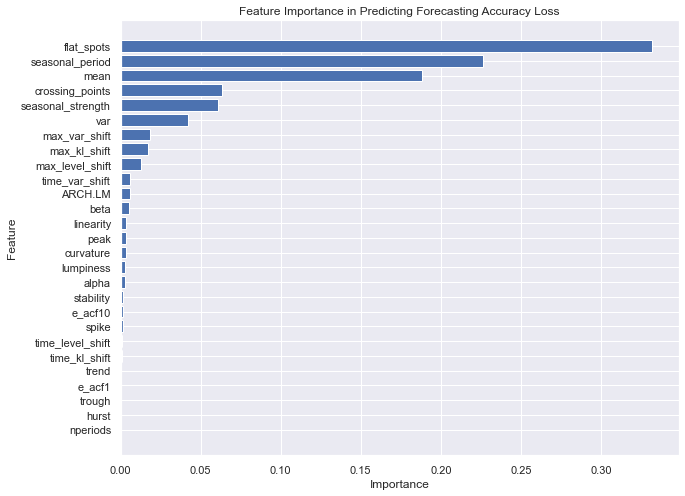

(1028, 27)
RMSE 0.19295404005197525
R2 0.9159119039769413


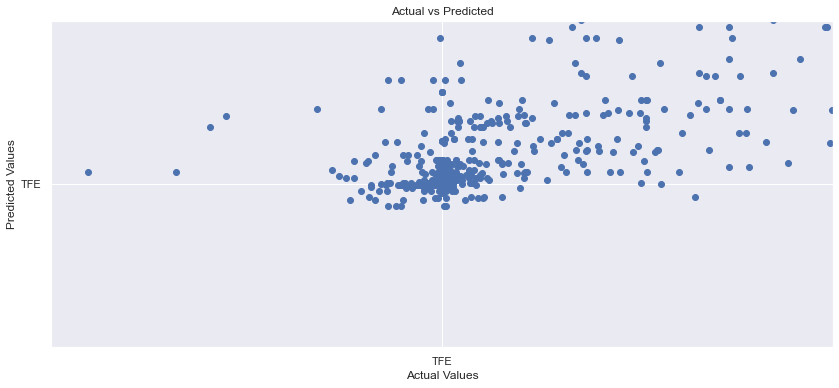

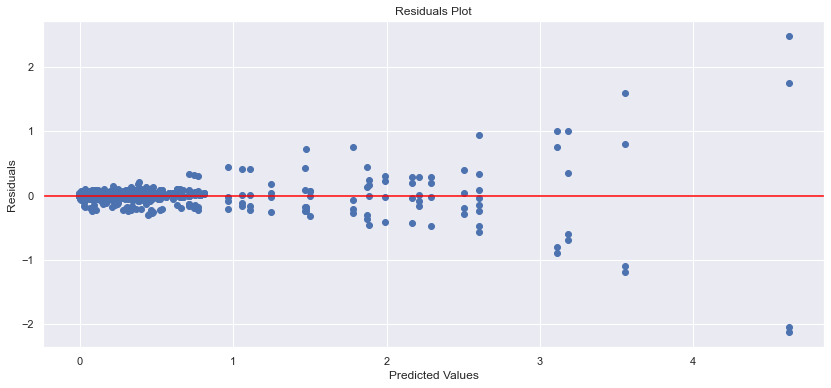

Training MSE: 0.19295404005197525
Training R^2: 0.9159119039769413


In [32]:
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")
palette = ['tab:blue', 'tab:green', 'tab:red']
hue_order = ['PMC', 'SZ', 'SWING']
sns.set(rc={"figure.figsize":(14, 6)})

features = pd.read_csv('../results/features/all_datasets_features.csv')
features = features.dropna(axis=1)
feature_columns = features.columns[2:-2]
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
display(X_train.shape)
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

feature_importance = gbm.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Time Series Feature')
plt.title('Feature Importance in Predicting Forecasting Accuracy Loss')
plt.gca().invert_yaxis()
plt.show()

X_test = features[feature_columns]
y_test = features[['TFE']]
print(X_test.shape)
y_pred = gbm.predict(X_test)

mse = mean_squared_error(y_test.values.squeeze(), y_pred)
rmse = np.sqrt(mse)
print('RMSE', rmse)
r2 = r2_score(y_test.values.squeeze(), y_pred)
print('R2', r2)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()
residuals = y_test.values.squeeze() - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

train_predictions = gbm.predict(X_train)

# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, train_predictions)

print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

In [108]:
pd.read_csv('../results/features/all_datasets_features.csv')

,compression,eb,mean,var,max_kl_shift,time_kl_shift,max_level_shift,time_level_shift,max_var_shift,time_var_shift,...,spike,linearity,curvature,e_acf1,e_acf10,seasonal_strength,peak,trough,data,TFE
0,SZ,0.00,14.487689,5.129617e+01,4.339038,8106.0,1.260713,6864.0,1.115841,8062.0,...,3.294328e-10,-67.789699,27.281865,0.993917,7.548032,0.637575,57.0,31.0,ettm2,0.000000
1,SWING,0.00,14.487689,5.129617e+01,4.339038,8106.0,1.260713,6864.0,1.115841,8062.0,...,3.294328e-10,-67.789699,27.281865,0.993917,7.548032,0.637575,57.0,31.0,ettm2,0.000000
2,PMC,0.00,14.487689,5.129617e+01,4.339038,8106.0,1.260713,6864.0,1.115841,8062.0,...,3.294328e-10,-67.789699,27.281865,0.993917,7.548032,0.637575,57.0,31.0,ettm2,0.000000
3,SZ,0.01,14.487583,5.126219e+01,4.453332,8106.0,1.259974,6864.0,1.107009,8062.0,...,3.224037e-10,-67.922977,27.291752,0.992807,7.517633,0.639062,57.0,31.0,ettm2,0.004511
4,SZ,0.01,14.487583,5.126219e+01,4.453332,8106.0,1.259974,6864.0,1.107009,8062.0,...,3.224037e-10,-67.922977,27.291752,0.992807,7.517633,0.639062,57.0,31.0,ettm2,-0.000272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,SWING,0.65,5174.411636,4.563589e+05,716.713528,2983.0,8.346825,8686.0,22.945240,8660.0,...,1.813986e-09,-63.322846,-7.697834,0.940626,4.936768,0.000000,21.0,41.0,aus,2.366937
1024,SWING,0.80,4652.523827,3.302232e+06,253.996837,40265.0,3.212158,40219.0,2.646098,40195.0,...,1.860998e-11,-171.485525,70.134859,0.969033,5.978703,0.000002,11.0,34.0,aus,3.526289
1025,SWING,0.80,4652.523827,3.302232e+06,253.996837,40265.0,3.212158,40219.0,2.646098,40195.0,...,1.860998e-11,-171.485525,70.134859,0.969033,5.978703,0.000002,11.0,34.0,aus,4.191845
1026,SWING,0.80,4652.523827,3.302232e+06,253.996837,40265.0,3.212158,40219.0,2.646098,40195.0,...,1.860998e-11,-171.485525,70.134859,0.969033,5.978703,0.000002,11.0,34.0,aus,2.580953


In [109]:
import shap
np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features.csv')
features = features[features.TFE <= 0.7]
features = features.dropna(axis=1)
feature_columns = features.columns[2:-2]
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
display(X_train.shape)
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_test)
feature_importance = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame(list(zip(X_train.columns, feature_importance)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn with your provided settings
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=feature_importance_df.iloc[:-6], y='Importance', x='Feature', palette='viridis')
# plt.title("Top Features Based on SHAP Values", fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(l, fontsize=16)
    ax.set_ylabel(y, fontsize=16)

# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.23)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/shap_values.pdf')
plt.show()




(901, 42)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 0.270685, while the model output was 0.361979. If this difference is acceptable you can set check_additivity=False to disable this check.

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


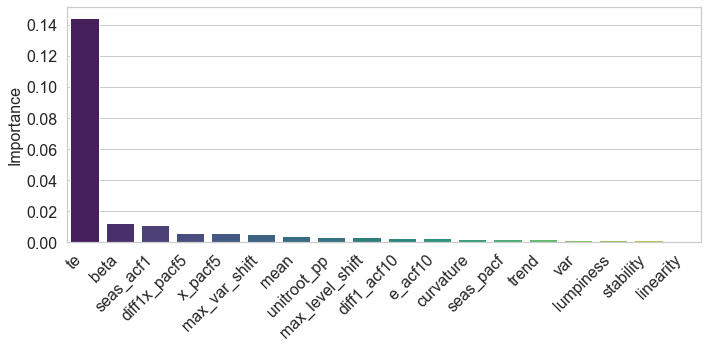

Training MSE: 0.05070008159202398
Training R^2: 0.9462209904960306


In [116]:
import shap
np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features_diff.csv')
features = features[features.TFE <= 0.8]
features = features.dropna(axis=1)
# features = features.drop('seasonal_period', axis=1)
feature_columns = features.columns[2:-3]
feature_columns = feature_columns.tolist()+['te']
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)
feature_importance = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame(list(zip(X_train.columns, feature_importance)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn with your provided settings
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=feature_importance_df.iloc[:-25], y='Importance', x='Feature', palette='viridis')
# plt.title("Top Features Based on SHAP Values", fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(l, fontsize=16)
    ax.set_ylabel(y, fontsize=16)

# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.23)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/shap_values.pdf')
plt.show()
train_predictions = gbm.predict(X_train)
feature_importance_df.to_csv('../results/features/features_shap_values.csv', index=False)
# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, train_predictions)

print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

In [115]:
feature_columns.tolist()+['te']

['mean',
 'var',
 'max_kl_shift',
 'time_kl_shift',
 'max_level_shift',
 'time_level_shift',
 'max_var_shift',
 'time_var_shift',
 'x_acf1',
 'x_acf10',
 'diff1_acf1',
 'diff1_acf10',
 'diff2_acf1',
 'diff2_acf10',
 'seas_acf1',
 'ARCH.LM',
 'crossing_points',
 'entropy',
 'flat_spots',
 'alpha',
 'beta',
 'hurst',
 'lumpiness',
 'nonlinearity',
 'x_pacf5',
 'diff1x_pacf5',
 'diff2x_pacf5',
 'seas_pacf',
 'stability',
 'unitroot_kpss',
 'unitroot_pp',
 'nperiods',
 'seasonal_period',
 'trend',
 'spike',
 'linearity',
 'curvature',
 'e_acf1',
 'e_acf10',
 'seasonal_strength',
 'peak',
 'trough',
 'te']

In [109]:
display(features)

,compression,eb,mean,var,max_kl_shift,time_kl_shift,max_level_shift,time_level_shift,max_var_shift,time_var_shift,...,linearity,curvature,e_acf1,e_acf10,seasonal_strength,peak,trough,data,te,TFE
0,SZ,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ettm2,0.000000,0.000000
1,SWING,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ettm2,0.000000,0.000000
2,PMC,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ettm2,0.000000,0.000000
3,SZ,0.01,-0.000106,-0.033983,0.114294,0.0,-0.000739,0.0,-0.008832,0.0,...,-0.133278,0.009886,-0.001110,-0.030398,0.001486,0.0,0.0,ettm2,0.002304,0.004511
4,SZ,0.01,-0.000106,-0.033983,0.114294,0.0,-0.000739,0.0,-0.008832,0.0,...,-0.133278,0.009886,-0.001110,-0.030398,0.001486,0.0,0.0,ettm2,0.002304,-0.000272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,SWING,0.10,-55.340742,-127496.617748,5.983095,3315.0,0.263812,2.0,0.555036,2.0,...,-1.135803,-0.748663,-0.057973,-0.297414,-0.032603,33.0,1.0,aus,0.043368,0.326196
995,SWING,0.10,-55.340742,-127496.617748,5.983095,3315.0,0.263812,2.0,0.555036,2.0,...,-1.135803,-0.748663,-0.057973,-0.297414,-0.032603,33.0,1.0,aus,0.043368,0.292007
996,SWING,0.15,-126.532493,-235117.133051,-3.727758,-9087.0,0.194555,-4.0,0.882132,3.0,...,-2.944640,-0.267820,-0.089455,-0.606400,-0.084937,1.0,2.0,aus,0.066398,0.713472
998,SWING,0.15,-126.532493,-235117.133051,-3.727758,-9087.0,0.194555,-4.0,0.882132,3.0,...,-2.944640,-0.267820,-0.089455,-0.606400,-0.084937,1.0,2.0,aus,0.066398,0.584630


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


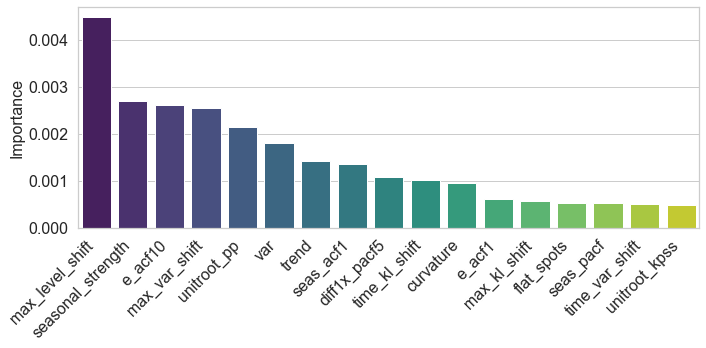

Training MSE: 0.02004618539985378
Training R^2: 0.6321153821123853


In [106]:
import shap
np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features_diff.csv')
features = features[features.TFE <= 0.8]
features = features.dropna(axis=1)
# features = features.drop('seasonal_period', axis=1)
feature_columns = features.columns[2:-2]
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)
feature_importance = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame(list(zip(X_train.columns, feature_importance)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn with your provided settings
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=feature_importance_df.iloc[:-25], y='Importance', x='Feature', palette='viridis')
# plt.title("Top Features Based on SHAP Values", fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(l, fontsize=16)
    ax.set_ylabel(y, fontsize=16)

# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.23)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/shap_values.pdf')
plt.show()
train_predictions = gbm.predict(X_train)
feature_importance_df.to_csv('../results/features/features_shap_values.csv', index=False)
# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, train_predictions)

print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


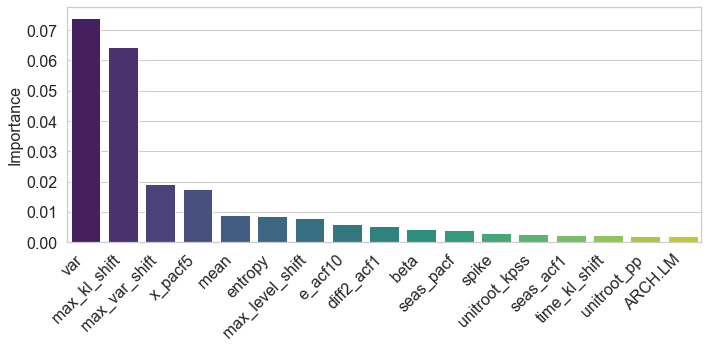

Training MSE: 0.05081382232159408
Training R^2: 0.9459794238207752


In [104]:
np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features_diff_percentage.csv')
features = features[features.TFE <= 0.8]
features = features.dropna(axis=1)
# features = features.drop('seasonal_period', axis=1)
feature_columns = features.columns[2:-2]
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)
feature_importance = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame(list(zip(X_train.columns, feature_importance)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn with your provided settings
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=feature_importance_df.iloc[:-25], y='Importance', x='Feature', palette='viridis')
# plt.title("Top Features Based on SHAP Values", fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(l, fontsize=16)
    ax.set_ylabel(y, fontsize=16)

# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.23)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/shap_values_percentage.pdf')
plt.show()
train_predictions = gbm.predict(X_train)
feature_importance_df.to_csv('../results/features/features_shap_values_percentage.csv', index=False)
# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, train_predictions)

print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

In [97]:
df = pd.read_csv('../results/features/all_datasets_features_diff.csv')
df = df[df.TFE <= 0.1]
df[feature_importance_df.Feature.values[:5]] = df[feature_importance_df.Feature.values[:5]].abs()
df = df[['compression', 'data'] + feature_importance_df.Feature.values[:5].tolist()]
df_mean = df.groupby(['data', 'compression']).mean().reset_index()
df_std = df.groupby(['data', 'compression']).std().reset_index()

In [102]:
compression_order = ['PMC', 'SWING', 'SZ']
dataset_order = ['ettm1', 'ettm2', 'solar', 'weather', 'aus', 'wind']

df_mean['compression'] = pd.Categorical(df_mean['compression'], categories=compression_order, ordered=True)
df_std['compression'] = pd.Categorical(df_std['compression'], categories=compression_order, ordered=True)
df_mean['data'] = pd.Categorical(df_mean['data'], categories=dataset_order, ordered=True)
df_std['data'] = pd.Categorical(df_std['data'], categories=dataset_order, ordered=True)

# Sort by the desired order
df_mean = df_mean.sort_values(['compression', 'data'])
df_std = df_std.sort_values(['compression', 'data'])


# Combine mean and std into one dataframe with rounded values
df_combined = df_mean.copy()
for column in df_mean.columns:
    if column not in ['compression', 'data']:
        df_combined[column] = df_mean[column].round(1).astype(str) + " (" + df_std[column].round(1).astype(str) + ")"

# Convert combined dataframe to LaTeX
latex_table = tabulate(df_combined, tablefmt="latex_booktabs", headers="keys", showindex=False)

print("Combined Table:\n", latex_table)

Combined Table:
 \begin{tabular}{lllllll}
\toprule
 data    & compression   & max\_kl\_shift   & max\_level\_shift   & mean      & max\_var\_shift   & unitroot\_pp   \\
\midrule
 ettm1   & PMC           & 4.9 (5.2)      & 0.0 (0.0)         & 0.0 (0.0) & 0.0 (0.0)       & 6.4 (6.6)     \\
 ettm2   & PMC           & 4.5 (7.0)      & 0.0 (0.0)         & 0.0 (0.0) & 0.0 (0.1)       & 1.0 (2.8)     \\
 solar   & PMC           & 9.0 (8.0)      & 0.0 (0.0)         & 0.0 (0.0) & 0.0 (0.0)       & 9.6 (9.2)     \\
 weather & PMC           & 29.7 (18.5)    & 0.0 (0.0)         & 0.0 (0.0) & 0.0 (0.0)       & 3.2 (2.2)     \\
 aus     & PMC           & 18.7 (19.6)    & 0.0 (0.0)         & 0.0 (0.0) & 0.0 (0.0)       & 66.5 (70.8)   \\
 wind    & PMC           & 43.3 (49.1)    & 0.0 (0.0)         & 0.0 (0.0) & 0.0 (0.0)       & 7.7 (7.2)     \\
 ettm1   & SWING         & 0.7 (1.3)      & 0.0 (0.1)         & 0.0 (0.1) & 0.0 (0.1)       & 7.1 (6.4)     \\
 ettm2   & SWING         & 0.3 (0.4)      & 0

In [100]:
display(df_mean)

,data,compression,max_kl_shift,max_level_shift,mean,max_var_shift,unitroot_pp
3,ettm1,PMC,4.864063,0.006491,5.697723e-09,0.010397,6.351702
6,ettm2,PMC,4.534636,0.006349,2.023904e-08,0.019845,0.958378
9,solar,PMC,8.958821,0.006514,5.962948e-10,0.002415,9.599968
12,weather,PMC,29.686001,0.029831,9.631190e-07,0.041753,3.212389
0,aus,PMC,18.713313,0.009642,1.833432e-06,0.018508,66.474020
15,wind,PMC,43.250979,0.005426,1.720967e-07,0.010007,7.728705
4,ettm1,SWING,0.708840,0.043200,4.394157e-02,0.045448,7.143680
7,ettm2,SWING,0.349255,0.013818,1.471714e-02,0.019182,5.921953
10,solar,SWING,0.874367,0.008827,1.977323e-01,0.041057,9.821930
13,weather,SWING,5.461688,0.070654,4.684909e-01,0.043708,11.023148


In [103]:
display(df_std)

,data,compression,max_kl_shift,max_level_shift,mean,max_var_shift,unitroot_pp
3,ettm1,PMC,5.213940,0.009358,5.797378e-09,0.016013,6.587349
6,ettm2,PMC,6.986619,0.013956,2.156406e-08,0.053047,2.826176
9,solar,PMC,7.989334,0.006798,5.145253e-10,0.003743,9.201161
12,weather,PMC,18.522554,0.033988,3.617702e-07,0.024346,2.179175
0,aus,PMC,19.609618,0.010983,1.813732e-06,0.022918,70.795614
15,wind,PMC,49.135073,0.013469,1.725697e-07,0.015762,7.241955
4,ettm1,SWING,1.281259,0.058705,5.240081e-02,0.063968,6.445127
7,ettm2,SWING,0.393350,0.014877,1.688913e-02,0.026395,5.241555
10,solar,SWING,2.215867,0.008159,1.883364e-01,0.063884,13.452200
13,weather,SWING,4.473236,0.031162,4.872339e-01,0.028766,7.844272
